**Importing Libraries**

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 **Loading Provided Dataset**

In [158]:
path="http://bit.ly/w-data"
data=pd.read_csv(path)

**Overview of Dataset**

In [159]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Checking information like shape, data-types of elements of the provided dataset**

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Checking for Null/NaN entries**

In [161]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [162]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualizing Relationship between dependent and independent variable**

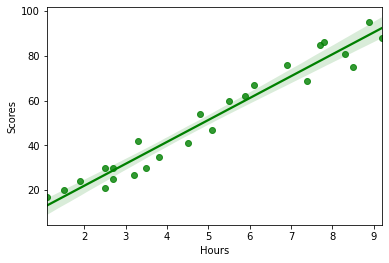

In [163]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='g')

In [164]:
y=data.Scores
del data['Scores']
X=data

In [165]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [166]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_valid=ss.transform(X_valid)

In [167]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
predictions1=model1.predict(X_valid)

In [169]:
from sklearn.metrics import mean_absolute_error

MAE1=mean_absolute_error(predictions1,y_valid)
MAE1

4.18385989900298

In [170]:
check=pd.DataFrame({'Actual':y_valid,'Predicted':predictions})
check

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [171]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=0)
model2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [172]:
predictions2=model2.predict(X_valid)

In [173]:
MAE2=mean_absolute_error(predictions2,y_valid)
MAE2

6.862833333333333

In [174]:
from xgboost import XGBRegressor

model3=XGBRegressor(random_state=0)
model3.fit(X_train,y_train)

[11:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [175]:
predictions3=model3.predict(X_valid)

In [176]:
MAE3=mean_absolute_error(y_valid,predictions3)
MAE3

9.220045852661134